# Google Colaboratoryの準備

- Googleアカウントにログインする
- 「接続」ボタンをクリックしランタイムに接続する

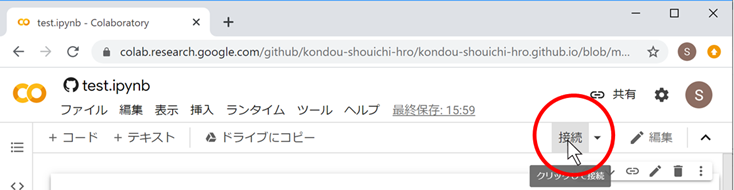
<br><br>


# ライブラリのインストール

次のセルを実行する。数分～十数分の時間がかかる。

* Deep Learningライブラリのインストール
* 学習済み重みファイル、設定ファイルのダウンロード
* 学習済みモデルの読み込み

等が行われる。

以下の画像のようにセルの左上にあるボタンをクリックすると実行される。

<br>
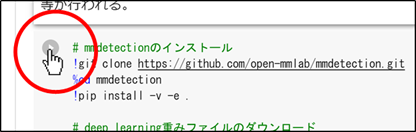
<br><br>

In [0]:
# mmdetectionのインストール
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -v -e .
!pip install -U pillow

# deep learning重みファイルのダウンロード
!curl -sc /tmp/cookie "https://drive.google.com/uc?export=download&id=149DCYqaehEC5ZCDB5rCNvC3vsqew1cmL" > /dev/null;CODE="$(awk '/_warning_/ {print $NF}' /tmp/cookie)" ;curl -Lb /tmp/cookie "https://drive.google.com/uc?export=download&confirm=${CODE}&id=149DCYqaehEC5ZCDB5rCNvC3vsqew1cmL" -o weight.pth

# deep learning設定ファイルのダウンロード
!wget https://raw.githubusercontent.com/kondou-shouichi-hro/kondou-shouichi-hro.github.io/master/shika_hiru_reppoints_moment_x101_dcn_fpn_2x_mt.py

# ライブラリのimport
from mmdet.apis import init_detector, inference_detector, show_result
from pathlib import Path
from tqdm import tqdm

# 解析画像保存用フォルダ
%cd ..
!mkdir images

# モデルのロード
model = init_detector('./mmdetection/shika_hiru_reppoints_moment_x101_dcn_fpn_2x_mt.py', './mmdetection/weight.pth')

# 解析画像のアップロード

- 左側ペインの「ファイル」アイコンをクリックし展開する
- 「images」フォルダを右クリックし「アップロード」をクリック
- ファイル選択ダイアログが出るので、解析したい画像を選択する（複数選択可）

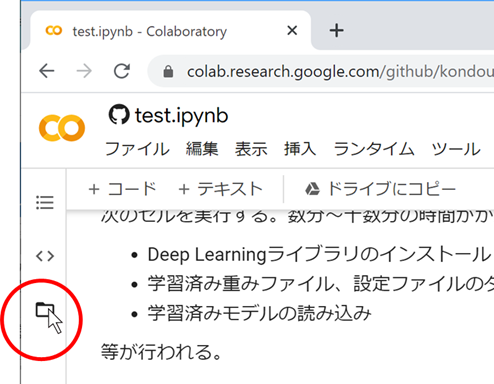
<br><br>
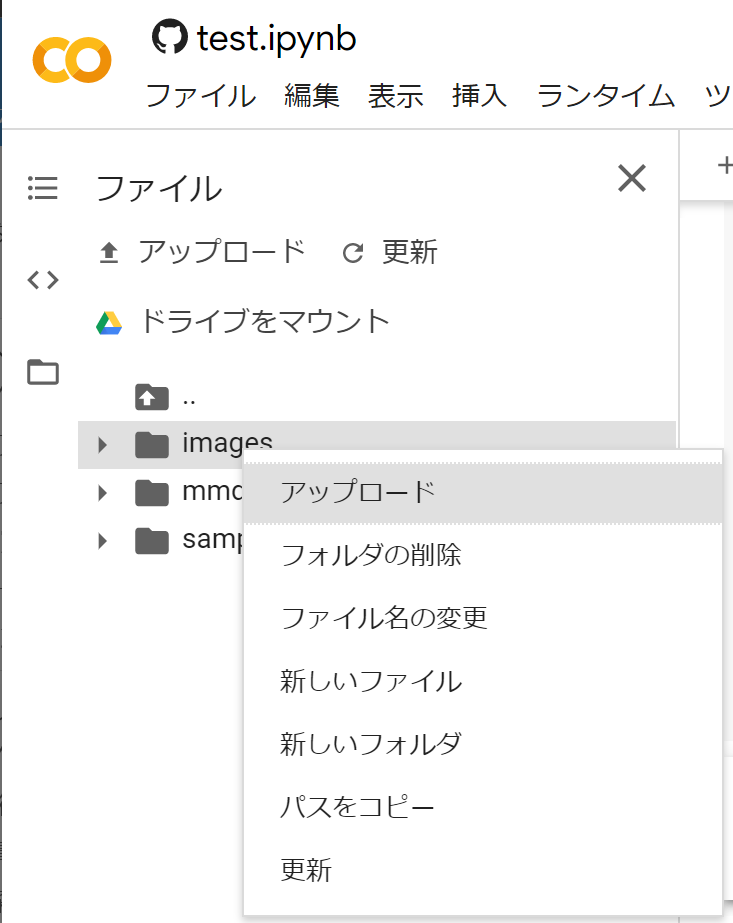

# シカ検出プログラムの実行

次のセルを実行する。1秒間に数枚くらいの速度。

In [0]:
input_dir = './images'
output_dir = './output'
score_thr = 0.5
from itertools import chain
types = ['jpg', 'png', 'JPG']

for name in tqdm(chain(*[Path(input_dir).glob(f'*.{ext}') for ext in types])):
  result = inference_detector(model, str(name))
  show_result(str(name), result, ('shika', 'a'), out_file=f'{output_dir}/{name.stem}.jpg', show=False, score_thr=score_thr)


# 結果のダウンロード

以下のセルを実行するとzipファイルに圧縮されてダウンロードできる。

In [0]:
!zip output -r output
from google.colab import files
files.download('output.zip')